En este notebook crearemos las muestra de dos EPA diferentes, el segundo trimestre de 2019 y el segundo trimestre de 2020.

Con esto, combinaremos ambas BBDD en una con un código "CONCAT" y realizaremos un EDA.

In [2]:
## Librerias a usar durante el proyecto

#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch
import seaborn as sns
import pandas_profiling

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import xgboost as xg

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import svm #support vector Machine
from sklearn.naive_bayes import GaussianNB #Naive bayes

import shap

In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Cargaos CSV separados por taburadores y concatenamos ambos

In [4]:
epa19t2 = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/Microdatos EPA - csv/EPA_2019T2.csv",sep='\t')

In [4]:
epa19t2.to_csv('EPA_19muestra.csv')

In [14]:
epa19t2.head(5)

,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,ncony,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
0,187,16,1,1,1,1,35,1,1,2,...,,1,1,1,,,,04,16,274.23001
1,187,16,1,1,1,2,35,2,6,1,...,05,,,1,,,,09,,274.23001
2,187,16,1,1,2,3,0,3,6,0,...,,,,1,,,,,,194.37000
3,187,16,1,2,1,1,45,1,6,0,...,,1,1,1,,,,03,13,203.82001
4,187,16,1,2,1,2,20,3,1,0,...,,2,2,1,,,,05,,203.82001


In [15]:
epa20t2 = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/Microdatos EPA - csv/EPA_2020T2.csv",sep='\t')

In [16]:
epa20t2.head(5)

,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,ncony,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
0,191,16,1,1,1,1,40,1,1,2,...,,1,1,1,,,,04,16,236.17
1,191,16,1,1,1,2,40,2,6,1,...,05,,,1,,,,09,,236.17
2,191,16,1,1,2,3,0,3,6,0,...,,,,1,,,,,,235.37
3,191,16,1,2,1,1,45,1,6,0,...,,1,1,1,,,,03,13,181.20
4,191,16,1,2,1,2,20,3,1,0,...,,2,2,1,,,,06,,181.20


Ya tenemos el CSV de ambas muestras. Esto e sun ejemplo de como podríamos unir todos los CSV y tener la muestra final para el análisis de ML. 

Con un código head vemos una parte de la muestra.

In [17]:
df = pd.concat([epa19t2, epa20t2])

In [18]:
df.head(5)

,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,ncony,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
0,187,16,1,1,1,1,35,1,1,2,...,,1,1,1,,,,04,16,274.23001
1,187,16,1,1,1,2,35,2,6,1,...,05,,,1,,,,09,,274.23001
2,187,16,1,1,2,3,0,3,6,0,...,,,,1,,,,,,194.37000
3,187,16,1,2,1,1,45,1,6,0,...,,1,1,1,,,,03,13,203.82001
4,187,16,1,2,1,2,20,3,1,0,...,,2,2,1,,,,05,,203.82001


In [19]:
df.describe

<bound method NDFrame.describe of         ciclo  ccaa  prov  nvivi  nivel  npers  edad5  relpp1  sexo1  ncony  \
0         187    16     1      1      1      1     35       1      1      2   
1         187    16     1      1      1      2     35       2      6      1   
2         187    16     1      1      2      3      0       3      6      0   
3         187    16     1      2      1      1     45       1      6      0   
4         187    16     1      2      1      2     20       3      1      0   
...       ...   ...   ...    ...    ...    ...    ...     ...    ...    ...   
147980    191    52    52  59635      1      1     45       1      6      2   
147981    191    52    52  59635      1      2     45       2      1      1   
147982    191    52    52  59635      1      3     16       3      1      0   
147983    191    52    52  59635      2      4     10       3      1      0   
147984    191    52    52  59635      2      5      5       3      6      0   

        ...  sidi

In [20]:
for data in[epa19t2, epa20t2, df]:
  print(data.shape)

(164764, 93)
(147985, 93)
(312749, 93)


Con este pequeñp describe vemos de que está compuesta el df.

Comparamos el número de filas y columnas de las dos muestras iniciales y de la unión de ambas.

In [68]:
df.to_csv('EPA_t2_muestra.csv')

EDA

In [2]:
df = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/EPA_t2_muestra.csv",sep=',')

Realizamos un Pandas Profile Report que nos proporciona un EDA bastante rápido y con pocas lineas de códigos.

Luego continuaremos con un poco más de análisis con unos códigos extras.

In [ ]:
#Profiling de los datos en bruto
profile = pandas_profiling.ProfileReport(pd.read_csv("EPA_t2_muestra.csv"))

Summarize dataset:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
profile.to_file(outputfile="output_EDA.html")

In [5]:
#Dimensiones del Dataset
df.ndim

2

In [69]:
df.shape

(312749, 95)

In [7]:
#Muestra aleatoria del dataset
df.sample()

,Unnamed: 0,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
43310,43310,187,12,15,17397,2,3,0,3,1,...,,,,1,,,,,,166.35001


In [11]:
#Primes vistazo a nuestro Dataset
df.head()

,Unnamed: 0,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
0,0,187,16,1,1,1,1,35,1,1,...,,1,1,1,,,,04,16,274.23001
1,1,187,16,1,1,1,2,35,2,6,...,05,,,1,,,,09,,274.23001
2,2,187,16,1,1,2,3,0,3,6,...,,,,1,,,,,,194.37000
3,3,187,16,1,2,1,1,45,1,6,...,,1,1,1,,,,03,13,203.82001
4,4,187,16,1,2,1,2,20,3,1,...,,2,2,1,,,,05,,203.82001


In [12]:
df

,Unnamed: 0,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,...,sidi3,sidac1,sidac2,mun1,prore1,repaire1,traant,aoi,cse,factorel
0,0,187,16,1,1,1,1,35,1,1,...,,1,1,1,,,,04,16,274.23001
1,1,187,16,1,1,1,2,35,2,6,...,05,,,1,,,,09,,274.23001
2,2,187,16,1,1,2,3,0,3,6,...,,,,1,,,,,,194.37000
3,3,187,16,1,2,1,1,45,1,6,...,,1,1,1,,,,03,13,203.82001
4,4,187,16,1,2,1,2,20,3,1,...,,2,2,1,,,,05,,203.82001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312744,147980,191,52,52,59635,1,1,45,1,6,...,,2,2,1,,,,06,14,169.61000
312745,147981,191,52,52,59635,1,2,45,2,1,...,,1,1,1,,,,04,05,169.61000
312746,147982,191,52,52,59635,1,3,16,3,1,...,,,,1,,,,09,,169.61000
312747,147983,191,52,52,59635,2,4,10,3,1,...,,,,1,,,,,,152.44000


In [6]:
df.describe()

,Unnamed: 0,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,...,nmadre,nac1,anore1,edadest,hcurnr,dren,dcom,dtant,mun1,factorel
count,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,312749.000000,...,312749.000000,312749.000000,29255.000000,261218.000000,16582.000000,99640.000000,120550.000000,110500.000000,312749.000000,312749.000000
mean,78411.798554,188.892700,8.496615,26.451352,31561.633393,1.152771,2.053260,40.933490,2.129906,3.592926,...,0.519391,1.136518,16.321039,18.957361,319.499578,118.687324,147.209216,146.179104,1.044253,298.945153
std,45529.073389,1.997123,6.110992,14.051472,18419.365069,0.359767,1.136284,20.844313,1.332150,2.498276,...,0.876792,0.481178,13.373201,6.998642,444.249974,127.406978,134.690594,164.063560,0.468301,220.243503
min,0.000000,187.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.400000
25%,39093.000000,187.000000,4.000000,14.000000,15627.000000,1.000000,1.000000,25.000000,1.000000,1.000000,...,0.000000,1.000000,8.000000,14.000000,12.000000,10.000000,28.000000,20.000000,1.000000,152.070010
50%,78187.000000,187.000000,9.000000,28.000000,31421.000000,1.000000,2.000000,45.000000,2.000000,6.000000,...,0.000000,1.000000,14.000000,18.000000,30.000000,68.000000,117.000000,95.000000,1.000000,226.440000
75%,117280.000000,191.000000,12.000000,38.000000,47386.000000,1.000000,3.000000,60.000000,3.000000,6.000000,...,1.000000,1.000000,19.000000,22.000000,999.000000,192.000000,237.000000,214.000000,1.000000,369.179990
max,164763.000000,191.000000,52.000000,52.000000,66698.000000,2.000000,13.000000,65.000000,9.000000,6.000000,...,9.000000,3.000000,94.000000,85.000000,999.000000,720.000000,720.000000,840.000000,6.000000,2550.870100


In [8]:
#Valores nulos del dataset
df.isnull( ).sum( )

Unnamed: 0    0
ciclo         0
ccaa          0
prov          0
nvivi         0
             ..
repaire1      0
traant        0
aoi           0
cse           0
factorel      0
Length: 94, dtype: int64

In [22]:
#Tipos de las variables
df.dtypes

Unnamed: 0      int64
ciclo           int64
ccaa            int64
prov            int64
nvivi           int64
               ...   
repaire1       object
traant         object
aoi            object
cse            object
factorel      float64
Length: 94, dtype: object

In [10]:
#Valores unicos del dataset
df.nunique( )

Unnamed: 0    164764
ciclo              2
ccaa              19
prov              52
nvivi          66698
               ...  
repaire1          13
traant             1
aoi                8
cse               20
factorel       41130
Length: 94, dtype: int64

### EDA - Muestra procesada

In [9]:
df = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/df_stata.csv",sep=',')

In [11]:
print(df.columns.tolist())

['ciclo', 'ccaa', 'prov', 'nvivi', 'nivel', 'npers', 'edad5', 'relpp1', 'sexo1', 'ncony', 'npadre', 'nmadre', 'rellmili', 'eciv1', 'prona1', 'regna1', 'nac1', 'exregna1', 'anore1', 'nforma', 'rellb1', 'edadest', 'cursr', 'ncursr', 'cursnr', 'ncurnr', 'hcurnr', 'rellb2', 'trarem', 'ayudfa', 'ausent', 'rznotb', 'vincul', 'nuevem', 'ocup1', 'act11', 'situ', 'sp', 'ducon1', 'ducon2', 'ducon3', 'tcontm', 'tcontd', 'dren', 'dcom', 'proest', 'regest', 'parco1', 'parco2', 'horasp1', 'horasp2', 'horash1', 'horash2', 'horase1', 'horase2', 'extra', 'extpag1', 'extpag2', 'extnpg1', 'extnpg2', 'rzdifh', 'traplu', 'ocuplu1', 'actplu1', 'sitplu', 'horplu', 'mashor', 'dismas', 'rzndish', 'hordes', 'busotr', 'busca', 'desea', 'fobact', 'nbusca', 'asala', 'embus', 'itbu', 'disp', 'rzndis', 'empant', 'dtant', 'ocupa', 'acta', 'situa', 'ofemp', 'sidi1', 'sidi2', 'sidi3', 'sidac1', 'sidac2', 'mun1', 'prore1', 'repaire1', 'traant', 'aoi', 'cse', 'factorel', 'total', 'hombres', 'mujeres', 'genero', 'edad', '

In [13]:
df_procesado = df[['total', 'hombres', 'mujeres', 'genero', 'edad', 'noEstudios', 'educPrim', 'educSec', 
                  'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja', 'contratoIndefinido', 
                  'contratoTemporal', 'empleado', 'parado', 'participa', 'inactivo', 'si_ERTE', 'cobra', 'larga_duracion', 
                  'desempleado_3meses', 'desempleo_1año', 'desempleoMenos1año', 'agricultura', 'industa', 'construccion', 
                  'servicios', 'inmigrante', 'nativo', 'doblenacionalidad', 'solo_inscrito', 'andal', 'ara', 'astu', 'isbal', 
                  'canar', 'cant', 'castleon', 'castman', 'cata', 'valen', 'extre', 'gal', 'mad', 'mur', 'nav', 'vasc', 
                  'rio', 'ceumel']].copy()

In [14]:
df_procesado

,total,hombres,mujeres,genero,edad,noEstudios,educPrim,educSec,educTer,cualificacionAlta,...,cata,valen,extre,gal,mad,mur,nav,vasc,rio,ceumel
0,1,1,0,Hombres,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,Mujer,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,Mujer,4,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,Hombres,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,Mujer,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124223,1,0,1,Mujer,5,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
124224,1,1,0,Hombres,5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
124225,1,1,0,Hombres,2,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
124226,1,0,1,Mujer,2,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
df_procesado.to_csv('df_procesado_muestra.csv')

In [21]:
#Profiling de los datos procesados
pandas_profiling.ProfileReport(pd.read_csv("df_procesado_muestra.csv"))

Summarize dataset:   0%|          | 0/64 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile_procesados = pandas_profiling.ProfileReport(pd.read_csv("df_procesado_muestra.csv"))

In [24]:
profile_procesados.to_file("profile_procesados.html")

Summarize dataset:   0%|          | 0/64 [00:00<?, ?it/s]

FixedFormatter should only be used together with FixedLocator
There was an attempt to generate the bar missing values diagrams, but this failed.
    To hide this warning, disable the calculation
    (using `df.profile_report(missing_diagrams={"bar": False}`)
    If this is problematic for your use case, please report this as an issue:
    https://github.com/pandas-profiling/pandas-profiling/issues
    (include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (51).')
invalid value encountered in greater_equal


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df_procesado.columns

Index(['total', 'hombres', 'mujeres', 'genero', 'edad', 'noEstudios',
       'educPrim', 'educSec', 'educTer', 'cualificacionAlta',
       'cualificacionMedia', 'cualificacionBaja', 'contratoIndefinido',
       'contratoTemporal', 'empleado', 'parado', 'participa', 'inactivo',
       'si_ERTE', 'cobra', 'larga_duracion', 'desempleado_3meses',
       'desempleo_1año', 'desempleoMenos1año', 'agricultura', 'industa',
       'construccion', 'servicios', 'inmigrante', 'nativo',
       'doblenacionalidad', 'solo_inscrito', 'andal', 'ara', 'astu', 'isbal',
       'canar', 'cant', 'castleon', 'castman', 'cata', 'valen', 'extre', 'gal',
       'mad', 'mur', 'nav', 'vasc', 'rio', 'ceumel'],
      dtype='object')

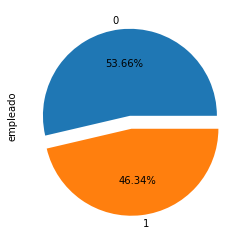

In [40]:
df_procesado['empleado'].value_counts().plot.pie(explode=[0, 0.15], autopct='%1.2f%%');

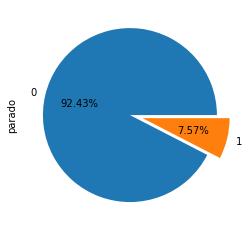

In [41]:
df_procesado['parado'].value_counts().plot.pie(explode=[0, 0.15], autopct='%1.2f%%');

In [38]:
df_procesado.groupby(['parado'])['participa'].value_counts()

parado  participa
0       1            57572
        0            57253
1       1             9403
Name: participa, dtype: int64

In [43]:
pd.crosstab(df_procesado.empleado,df_procesado.genero, normalize='index').style.background_gradient(cmap='crest')

genero,Hombres,Mujer
empleado,,
0,0.425333,0.574667
1,0.531369,0.468631


In [44]:
pd.crosstab(df_procesado.empleado,df_procesado.edad, normalize='index').style.background_gradient(cmap='crest')

edad,1,2,3,4,5
empleado,,,,,
0,0.085229,0.099211,0.053033,0.075372,0.687155
1,0.007660,0.112763,0.208834,0.308223,0.362520
